In [1]:
import os    
#os.environ['THEANO_FLAGS'] = "device=gpu1"  
#os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32,lib.cnmem=1"
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu0,floatX=float32"
import theano

from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import *
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# this is the size of our encoded representations
#encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
#encoding_dim = 3
encoding_dim = 25


# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(676, activation='relu')(input_img) #26X26
encoded = Dense(484, activation='relu')(encoded) #22X22
encoded = Dense(324, activation='relu')(encoded)  #18X18
encoded = Dense(144, activation='relu')(encoded)  #12X12
encoded = Dense(64, activation='relu')(encoded)  #8X8

encoded = Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)


Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN not available)
Using Theano backend.


In [2]:
print (encoding_dim)
print (input_img)
print (encoded)
print (decoded)
print (autoencoder)

25
input_1
Elemwise{mul,no_inplace}.0
sigmoid.0


In [3]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

In [4]:
print (encoder)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [6]:
print (encoded_input)
print (decoder_layer)
print (decoder)

input_2


In [7]:
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy')

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train)
print(x_test)

[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 ..., 
 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]]
[[[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  ..., 
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]]

 [[0 0 0 ..., 0 0 0]
  [0 0 0 ..., 0 0 0]

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(len(x_train))
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)
print (x_train.dtype)
print (x_test.dtype)
print (x_train)
print (x_test)

60000
(60000, 784)
(10000, 784)
(60000,)
(10000,)
float32
float32
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [11]:
nfold=10
nb_epoch=50
batch_size=256
random_state =33

In [12]:
kfold_weights_path = os.path.join('mnist_weights_kfold_' + str(nfold) + 
                                  '_epoch_'+str(nb_epoch)+
                                  '_batch_'+str(batch_size) +
                                  '_encoded_'+str(encoding_dim) +
                                  '.h5')
print(kfold_weights_path)

mnist_weights_kfold_10_epoch_50_batch_256_encoded_25.h5


In [13]:
kf = KFold(len(x_train), n_folds=nfold, shuffle=True, random_state=random_state)
print(kf)

sklearn.cross_validation.KFold(n=60000, n_folds=10, shuffle=True, random_state=33)


In [14]:
train_full_encoded_imgs = np.zeros(shape=[x_train.shape[0],encoding_dim])
print(train_full_encoded_imgs.shape)
print(x_test.shape)
test_full_encoded_imgs = np.zeros(shape=[x_test.shape[0],encoding_dim])
test_full_decoded_imgs = np.zeros(shape=[x_test.shape[0],x_test.shape[1]])
print(test_full_encoded_imgs.shape)
print(test_full_decoded_imgs.shape)

(60000, 25)
(10000, 784)
(10000, 25)
(10000, 784)


In [15]:
os.path.isfile(kfold_weights_path)

False

In [16]:
num_fold = 0
restore_from_last_checkpoint=0
for train_index,valid_index in kf:
    s_train,s_valid  = x_train[train_index], x_train[valid_index]
    
    noise_factor = 0.25
    s_train_noisy = s_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=s_train.shape) 
    s_valid_noisy = s_valid + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=s_valid.shape) 

    s_train_noisy = np.clip(s_train_noisy, 0., 1.)
    s_valid_noisy = np.clip(s_valid_noisy, 0., 1.)
    #y_train, y_test = y[train_index], y[test_index]
    
    num_fold += 1
    print('\n\nStart KFold number {} from {}'.format(num_fold, nfold))
    print('Split train: ', len(s_train_noisy), len(s_train))
    print('Split valid: ', len(s_valid_noisy), len(s_valid))

    if not os.path.isfile(kfold_weights_path) or restore_from_last_checkpoint == 0:
        callbacks = [
                EarlyStopping(monitor='val_loss', patience=1, verbose=0),
                ModelCheckpoint(kfold_weights_path, monitor='val_loss', save_best_only=True, verbose=0),
        ]
        autoencoder.fit(s_train_noisy, s_train,
                nb_epoch=nb_epoch,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(s_valid_noisy, s_valid),
                callbacks=callbacks)
    #if os.path.isfile(kfold_weights_path):
    #    autoencoder.load_weights(kfold_weights_path)
    
    # Store train predictions
    train_encoded_imgs = encoder.predict(x_train,batch_size=batch_size, verbose=1)
    train_full_encoded_imgs = np.add(train_full_encoded_imgs,train_encoded_imgs)

    
    # Store test predictions
    test_encoded_imgs = encoder.predict(x_test,batch_size=batch_size, verbose=1)
    #full_encoded_imgs = np.vstack([full_encoded_imgs,encoded_imgs])
    test_full_encoded_imgs = np.add(test_full_encoded_imgs,test_encoded_imgs)
    #full_encoded_imgs.append(encoded_imgs)
    #print(full_encoded_imgs.shape)
    
    test_decoded_imgs = decoder.predict(test_encoded_imgs,batch_size=batch_size, verbose=1)
    #full_decoded_imgs = np.vstack([full_decoded_imgs,decoded_imgs])
    test_full_decoded_imgs = np.add(test_full_decoded_imgs,test_decoded_imgs)



Start KFold number 1 from 10
Split train:  54000 54000
Split valid:  6000 6000
Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 5s - loss: 589.8486 - val_loss: 564.1437
Epoch 2/50
54000/54000 [==============================] - 5s - loss: 557.6439 - val_loss: 546.8995
Epoch 3/50
54000/54000 [==============================] - 5s - loss: 546.1357 - val_loss: 539.1646
Epoch 4/50
54000/54000 [==============================] - 5s - loss: 540.5105 - val_loss: 535.4717
Epoch 5/50
54000/54000 [==============================] - 5s - loss: 537.3285 - val_loss: 532.8509
Epoch 6/50
54000/54000 [==============================] - 5s - loss: 534.6841 - val_loss: 530.7008
Epoch 7/50
54000/54000 [==============================] - 5s - loss: 532.5600 - val_loss: 528.6607
Epoch 8/50
54000/54000 [==============================] - 5s - loss: 530.8059 - val_loss: 527.5175
Epoch 9/50
54000/54000 [==============================] - 5s - loss: 529.5047 

In [17]:
print(test_full_encoded_imgs.shape)
print(test_full_decoded_imgs.shape)
print(test_full_encoded_imgs)
print(test_full_decoded_imgs)

(10000, 25)
(10000, 784)
[[  527.97799683   734.47298813   886.30836487 ...,   583.79726028
    889.93103027   779.93975067]
 [  667.70310211    81.57831669   603.6771965  ...,   515.12591934
    913.86081696   365.79897308]
 [ 1275.63214111   551.88928604    82.98371148 ...,   907.71569824
   1363.25918579   885.09591675]
 ..., 
 [  409.27776718   678.30307007   309.19971848 ...,   260.0249157
    778.21221924   479.1549263 ]
 [  743.87985229   913.57566833  1452.5244751  ...,   278.59009552
    722.98593903   332.9692173 ]
 [    7.52289559   573.95938492   155.83238983 ...,   423.28487015
    330.95710373   460.72314453]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.04597443e-32   6.25419860e-34   1.05220407e-36 ...,   1.11256931e-30
    4.76704888e-30   4.38579019e-31]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.52586066e-37   4.15

In [18]:
test_res_encoded_imgs = test_full_encoded_imgs/nfold
test_res_decoded_imgs = test_full_decoded_imgs/nfold
print(test_res_encoded_imgs.shape)
print(test_res_decoded_imgs.shape)
print(test_res_encoded_imgs)
print(test_res_decoded_imgs)

(10000, 25)
(10000, 784)
[[  52.79779968   73.44729881   88.63083649 ...,   58.37972603
    88.99310303   77.99397507]
 [  66.77031021    8.15783167   60.36771965 ...,   51.51259193   91.3860817
    36.57989731]
 [ 127.56321411   55.1889286     8.29837115 ...,   90.77156982
   136.32591858   88.50959167]
 ..., 
 [  40.92777672   67.83030701   30.91997185 ...,   26.00249157
    77.82122192   47.91549263]
 [  74.38798523   91.35756683  145.25244751 ...,   27.85900955   72.2985939
    33.29692173]
 [   0.75228956   57.39593849   15.58323898 ...,   42.32848701
    33.09571037   46.07231445]]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.04597443e-33   6.25419860e-35   1.05220407e-37 ...,   1.11256931e-31
    4.76704888e-31   4.38579019e-32]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  2.52586066e-38   4.15744518e-32   1.12493997e-33 ...,   8.

In [19]:
train_res_encoded_imgs = train_full_encoded_imgs/nfold
print(train_res_encoded_imgs.shape)
print(train_res_encoded_imgs)

(60000, 25)
[[  36.02939377   47.54022522    1.63911474 ...,   34.86504784
    81.20817032   75.6874794 ]
 [  39.75662422   68.22014275   50.44898567 ...,   51.29592628
    48.29339676   36.54299831]
 [  75.98902512   22.68591166   29.84251156 ...,   53.97143707
     4.58583186   62.89119492]
 ..., 
 [  65.47621727   35.21867542   51.85757256 ...,   60.86599617
    68.29590225   85.91225891]
 [  36.92391357   84.53689346   19.3407589  ...,   75.52148819
    28.91720467   61.16138954]
 [  75.14092407  132.02388      86.03532181 ...,  102.84205475
    57.06687126   45.30354843]]


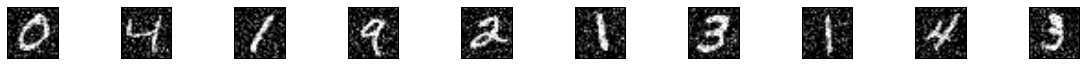

In [20]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    #ax = plt.subplot(1, n, i)
    plt.imshow(s_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

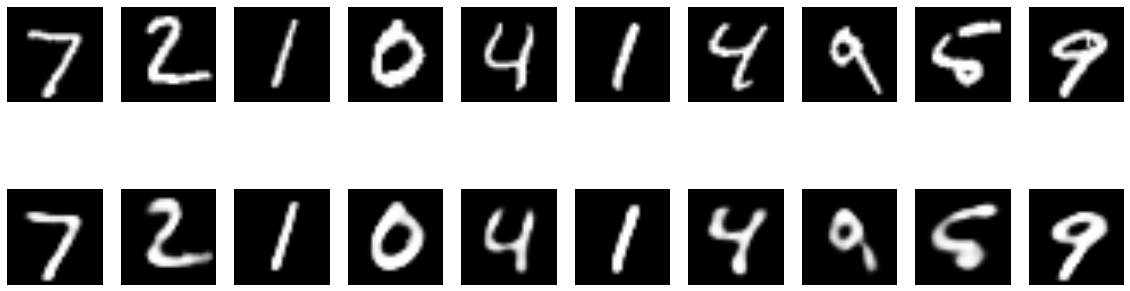

In [21]:

n = 10  # how many digits we will display
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded
    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(encoded_imgs[i].reshape(6, 6))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
   
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(test_res_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf = clf.fit(train_res_encoded_imgs, np.ravel(y_train))

In [23]:
y_pred = clf.predict(test_res_encoded_imgs)

In [24]:
num=len(test_res_encoded_imgs)
r=0
w=0
y_test = np.ravel(y_test)
for i in range(num):
        #print ('y_pred ',y_pred[i])
        #print ('labels ',labels[i])
        #without the use of all() returns error truth value of an array with more than one element is ambiguous
        #if y_pred[i].all() == labels[i].all():
        if np.array_equal(y_pred[i],y_test[i]):
            r+=1
        else:
            w+=1
print ("tested ",  num, "digits")
print ("correct: ", r, "wrong: ", w, "error rate: ", float(w)*100/(r+w), "%")
print ("got correctly ", float(r)*100/(r+w), "%")


tested  10000 digits
correct:  9513 wrong:  487 error rate:  4.87 %
got correctly  95.13 %


In [25]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [26]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)